In [ ]:
import pandas as pd 

import matplotlib.pyplot as plt
# we use xgboost gradient boosting decsion trees model for this experiment 
from sklearn.feature_extraction.text import  CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn import metrics

import xgboost as xgb

import scikitplot as skplt

In [11]:
df= pd.read_csv('./data/consensus_dataset.csv').drop(columns = 'Unnamed: 0')
df

,ad,consensus
0,we are fighting against a 1 million smear camp...,1
1,big thanks to our freenewyork partners and th...,0
2,we need your help to hit our fundraising goal ...,1
3,should sacramento stop loyalty programs for ho...,0
4,urgent we just launched ads against mitch mcco...,1
...,...,...
13271,let’s declare war on israel from the title of ...,1
13272,some legislators tell us “not in my backyard” ...,1
13273,youre invited to a live debate on question ho...,0
13274,no one should be left behind when it comes to ...,0


In [12]:
X_train, X_test, y_train, y_test= train_test_split( df['ad'], df['consensus'], test_size =0.2)

In [13]:
tf_vectorizer = CountVectorizer() 

X_train_tf = tf_vectorizer.fit_transform(X_train)
X_test_tf = tf_vectorizer.transform(X_test)

In [14]:
xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(X_train_tf, y_train)

XGBClassifier()

accuracy:   0.988
              precision    recall  f1-score   support

no consensus       0.98      1.00      0.99      1371
   consensus       1.00      0.98      0.99      1285

    accuracy                           0.99      2656
   macro avg       0.99      0.99      0.99      2656
weighted avg       0.99      0.99      0.99      2656

confusion matrix:
[[1371    0]
 [  32 1253]]



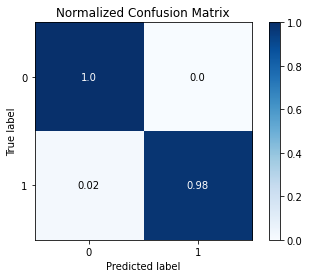

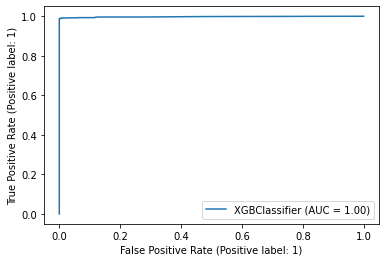

In [16]:
# predict the labels on validation dataset
predictions = xgb_clf.predict(X_test_tf)

# model performance
score = metrics.accuracy_score(y_test, predictions)
print("accuracy:   %0.3f" % score)

print(metrics.classification_report(y_test, predictions, target_names=['no consensus', 'consensus']))

print("confusion matrix:")
print(metrics.confusion_matrix(y_test, predictions))
print()

skplt.metrics.plot_confusion_matrix(y_test, predictions, normalize=True)
plt.show()
disp = metrics.RocCurveDisplay.from_estimator(xgb_clf, X_test_tf, y_test)

In [20]:
import string 
df_val = pd.read_csv('./data/sample_consensus.csv')

df_val['ad'] = df_val['ad'].str.strip().str.lower() 
df_val['ad'] = df_val['ad'].str.replace('\d+', '')
df_val['ad']=  df_val['ad'].str.translate(str.maketrans('','',string.punctuation))
df_val

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """


,ad,consensus
0,virtually everyone knows america has a big ill...,1
1,everyone knows smoking causes cancer but did y...,1
2,virtually everyone knows america has a big ill...,1
3,everyone knows michigan auto insurance is the ...,1
4,canadians from every region have shared with m...,1
5,voters want free and fair elections when im go...,1
6,massive crowds last evening for the meeting on...,1
7,several questions have come my way since the a...,0
8,brad recently stopped by to talk to henry hint...,0
9,british chickens are typically fed on soya fro...,0


accuracy:   0.714
              precision    recall  f1-score   support

no consensus       0.56      1.00      0.71         5
   consensus       1.00      0.56      0.71         9

    accuracy                           0.71        14
   macro avg       0.78      0.78      0.71        14
weighted avg       0.84      0.71      0.71        14

confusion matrix:
[[5 0]
 [4 5]]



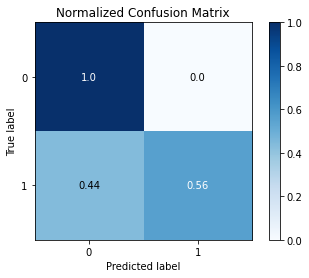

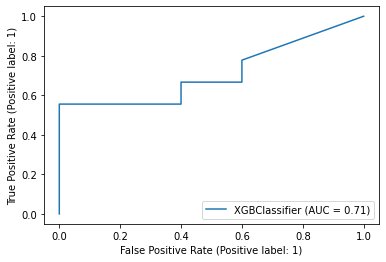

In [22]:
X_val = tf_vectorizer.transform(df_val['ad'])
y_val = df_val['consensus']

y_pred = xgb_clf.predict(X_val)

score = metrics.accuracy_score(y_val, y_pred)
print("accuracy:   %0.3f" % score)

print(metrics.classification_report(y_val, y_pred, target_names=['no consensus', 'consensus']))

print("confusion matrix:")
print(metrics.confusion_matrix(y_val, y_pred))
print()

skplt.metrics.plot_confusion_matrix(y_val, y_pred, normalize=True)
plt.show()
disp = metrics.RocCurveDisplay.from_estimator(xgb_clf, X_val, y_val)